In [1]:
%config Completer.use_jedi = False
line = [True,False,True,True,False,True,True,True,False,False]
probabilities = [0.1]*len(line)
pos = len(line)//2
states = list(range(len(probabilities)))

In [2]:
sensor_acc = 0.9
move_acc = 0.95

In [3]:
def p_y(e):
    s = 0
    for i in states:
        s+= p_y_x(e,i)*probabilities[i]
        
    return s

def p_y_x(y,x):
    inv = line[x] != y
    
    if inv:
        return 1-sensor_acc
    return sensor_acc

def p_x_y(x,y):
    return (p_y_x(y,x) * probabilities[x])/p_y(y)

def updateState():
    global probabilities
    reading = line[pos]
    probabilities = list(map(lambda x:p_x_y(x,reading),states))

def moveLeft():
    global pos
    # global probabilities
    
    pos += -1
    reading = line[pos]
    
    for i in states[:-1]:
        probabilities[i] = probabilities[i] * (1-move_acc) + probabilities[i+1] * move_acc
        
    probabilities[-1] = probabilities[i] * (1-move_acc)
    updateState()
    
def moveRight():
    global pos
    #global probabilities
    
    pos += 1
    reading = line[pos]
    
    for i in states[:1:-1]:
        probabilities[i] = probabilities[i] * (1-move_acc) + probabilities[i-1] * move_acc
        
    probabilities[0] = probabilities[i] * (1-move_acc)
    updateState()

In [5]:
probabilities = [0.1]*len(line)
pos = 5#len(line)//2

In [6]:
updateState()

In [230]:
for i in range(3):
    moveLeft()
    
for i in range(3):
    moveRight()

True

<BarContainer object of 11 artists>

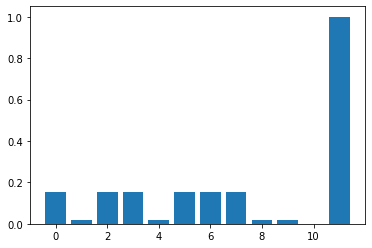

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(states+[len(states)+1],probabilities+[sum(probabilities)])

* p(y) 